Importing the Dependencies

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection and Data Processing

In [20]:
wineData = pd.read_csv("winequality-red.csv")
wineData.head(11)    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [21]:
wineData.shape

(1599, 12)

In [22]:
wineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
X = wineData.drop(columns=['quality'])
y = wineData['quality'].apply(lambda y_value : 1 if y_value >= 7 else 0)

In [24]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64

In [25]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

No of values for each quality

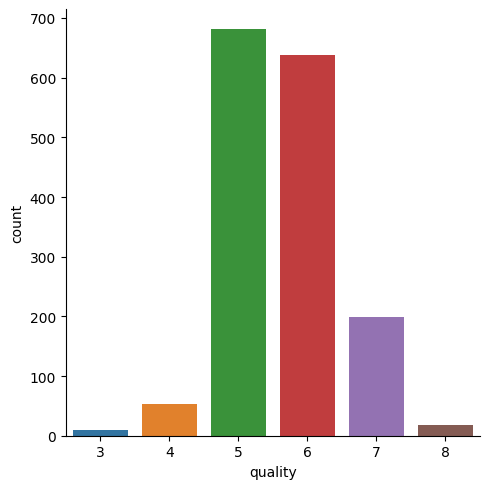

In [26]:
sns.catplot(x='quality', data=wineData, kind='count')

Checking for missing values

In [27]:
wineData.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y)


In [29]:
tree = DecisionTreeClassifier(max_depth=8)
tree.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.969
Accuracy on test set: 0.844


In [30]:
random = RandomForestClassifier(max_depth=8, min_samples_leaf=4)
random.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(random.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(random.score(X_test, y_test)))

Accuracy on training set: 0.952
Accuracy on test set: 0.894


In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))


Accuracy on training set: 0.906
Accuracy on test set: 0.841


In [32]:
models = [tree,random,knn]
means = []
for model in models:
    kfold = KFold(n_splits=5)
    scores = cross_val_score(model, X, y, cv=kfold)
    means.append(scores.mean())
    print(model,"- Average CV score: {:.3f}".format(scores.mean()))

DecisionTreeClassifier(max_depth=8) - Average CV score: 0.861
RandomForestClassifier(max_depth=8, min_samples_leaf=4) - Average CV score: 0.887
KNeighborsClassifier() - Average CV score: 0.858


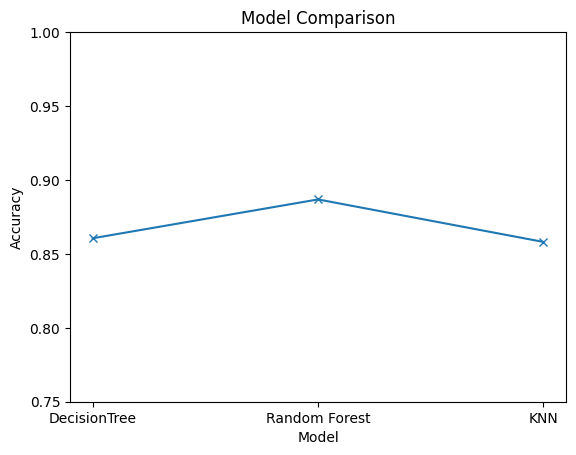

In [39]:
labels = ["DecisionTree", "Random Forest", "KNN"]
plt.plot(labels,means, marker='x')
plt.ylim(0.75,1)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

Building a predictive system 

In [40]:
input_data = (7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.5,9.0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = random.predict(input_data_reshaped)

print(prediction)

if (prediction[0]==1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

[0]
Bad Quality Wine


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
